In [1]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  
from scipy.stats.stats import pearsonr
from google.colab import drive

In [2]:
drive.mount('mydrive')

Mounted at mydrive


In [3]:
spoti = pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/spotify_edited.csv", sep= ";") 
spoti

,ID,title,artist,genre,year,bpm,nrgy,dnce,val,dur,lyrics,pop
0,1,"Hey, Soul Sister",Train,no pop,2010,97,89,67,80,217,4,83
1,2,Love The Way You Lie,Eminem,no pop,2010,87,93,75,64,263,23,82
2,3,TiK ToK,Kesha,pop,2010,120,84,76,71,200,14,80
3,4,Bad Romance,Lady Gaga,pop,2010,119,92,70,71,295,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,221,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,16,176,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,61,206,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,2019,136,76,53,65,260,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,24,217,7,69


H3: Cuanto más ritmo (bpm) tenga la canción, más popular será.

In [4]:
res = spoti.bpm.describe().round(3)
res

count    603.000
mean     118.546
std       24.795
min        0.000
25%      100.000
50%      120.000
75%      129.000
max      206.000
Name: bpm, dtype: float64

In [5]:
m  = res[1]
sd = res[2]
n  = res[0]
print("Mean:",m,"\n","Standard Deviation:",sd,"\n","N:",n)

Mean: 118.546 
 Standard Deviation: 24.795 
 N: 603.0


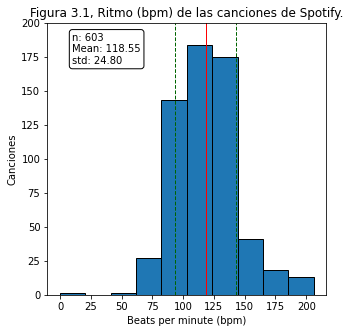

In [6]:
plt.figure(figsize=(5,5))
x=spoti.bpm
plt.hist (x, bins=10,edgecolor="black")
plt.title("Figura 3.1, Ritmo (bpm) de las canciones de Spotify.")
plt.xlabel("Beats per minute (bpm)")
plt.ylabel("Canciones")
props = dict (boxstyle="round", facecolor ="white", lw =1)
plt.xticks(np.arange(0, 225, step=25))
plt.yticks(np.arange(0, 225, step=25))
plt.text(10, 170, "n: 603" "\n" "Mean: 118.55" "\n" "std: 24.80", bbox=props)
plt.axvline(x=m, linewidth=1, linestyle= 'solid',color="red", label='Mean')
plt.axvline(x=(m+sd) , linewidth=1, linestyle= 'dashed',color="darkgreen", label='25%')
plt.axvline(x=(m-sd), linewidth=1, linestyle= 'dashed',color="darkgreen", label='75%')

In [7]:
x= spoti.bpm
y=spoti["pop"]
pearsonr (x,y)
r, p_val = pearsonr(x,y)
n = len(spoti["pop"])
print('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

r: 0.019 P.Val: 0.642 n: 603


Text(2, 85, '$\\mathrm{r}=0.02$\n$\\mathrm{P.Val:}=0.642$\n$\\mathrm{n}=603$')

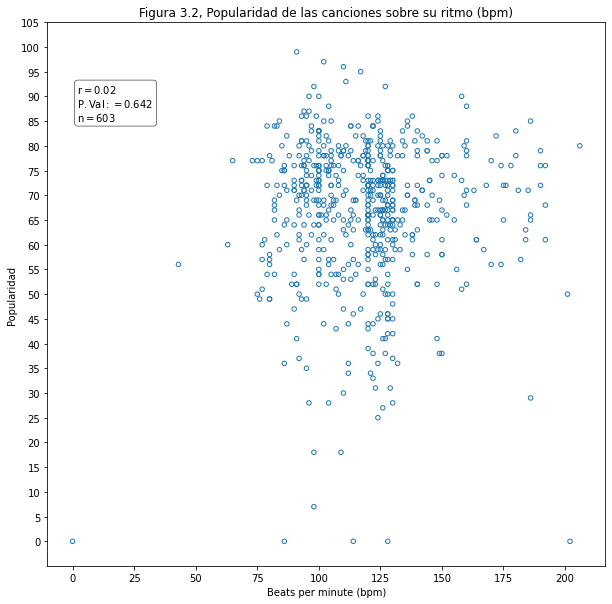

In [8]:
plt.figure(figsize=(10,10))
x= spoti.bpm
y=spoti["pop"]
plt.scatter (x, y, s=20, facecolors="none", edgecolors="C0")
plt.xticks(np.arange(0,225,step=25))
plt.yticks(np.arange(0,110,step=5))
plt.title("Figura 3.2, Popularidad de las canciones sobre su ritmo (bpm)")
plt.xlabel("Beats per minute (bpm)")
plt.ylabel("Popularidad")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (2,85, textstr , bbox=props)

Text(2, 85, '$\\mathrm{r}=0.02$\n$\\mathrm{P.Val:}=0.642$\n$\\mathrm{n}=603$')

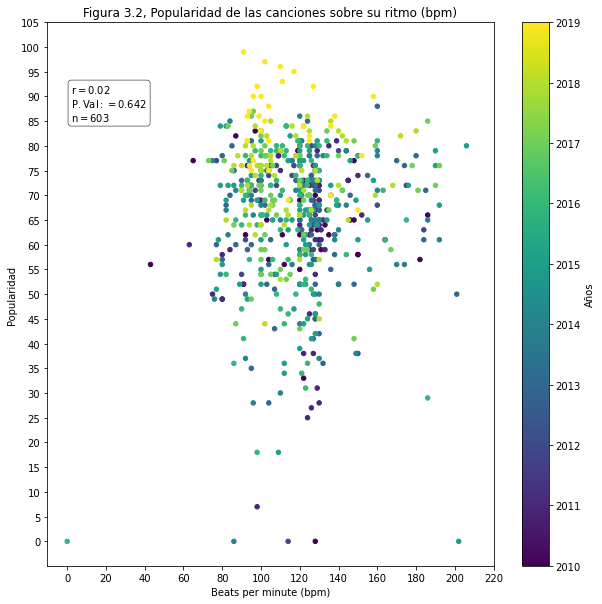

In [9]:
plt.figure(figsize=(10,10))
x= spoti.bpm
y=spoti["pop"]
z=spoti.year
plt.scatter (x, y, s=20,facecolors="none", c= z)
plt.colorbar (label="Años", orientation="vertical")
plt.xticks(np.arange(0,225,step=20))
plt.yticks(np.arange(0,110,step=5))
plt.title("Figura 3.2, Popularidad de las canciones sobre su ritmo (bpm)")
plt.xlabel("Beats per minute (bpm)")
plt.ylabel("Popularidad")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (2,85, textstr , bbox=props)
